In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Ignore
# GFG :Read the video from specified path
#https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=videocapture%20set#bool%20VideoCapture::set%28int%20propId,%20double%20value%29
#cam = cv2.VideoCapture("kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV")
#cam.isOpened()
#Doesn't work, retval : false

In [ ]:
#Use following command b4 importing napari:
#pip install napari[all] napari_video
#if needed:
#pip install xgboost 
#Resources- links used
#https://github.com/janclemenslab/napari-video
#https://forum.image.sc/t/working-with-mov-and-other-movie-files-in-python-dask/34053

In [6]:
import napari
from napari_video.napari_video import VideoReaderNP
# /kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV
#vr = VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV')
#print(vr)

TRY THIS: First, we load the movie to be annotated. Since behavior movies can be quite long, we will use a lazy loading strategy (i.e., we will only load the frames as they are used). Using dask-image, we can construct an object that we can pass to napari for lazy loading in just one line. For more explanation on using dask to lazily load images in napari, see this tutorial.

In [7]:
vdos = []
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5136.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5297.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/89. warm/MVI_9495.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/89. warm/MVI_9336.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/90. cool/MVI_9337.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/90. cool/MVI_9338.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/91. new/MVI_9261.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/91. new/MVI_9421.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/88. cold/MVI_5140.MOV'))

#7-10 index test
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/90. cool/MVI_9339.MOV'))
vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/89. warm/MVI_5302.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/91. new/MVI_5148.MOV'))
#vdos.append(VideoReaderNP('/kaggle/input/include/Adjectives_6of8/Adjectives/88. cold/MVI_9490.MOV'))
#/kaggle/input/include/Clothes_2of2/Clothes/46. Clothing/MVI_5181.MOV

In [14]:
Y_train = pd.DataFrame(columns = ["Class"])
Y_test = pd.DataFrame(["hot","cool","warm"],columns = ["Class"])
labels = ["hot","hot","warm","warm","cool","cool"]
Y_train["Class"] = labels
Y_train, Y_test

(  Class
 0   hot
 1   hot
 2  warm
 3  warm
 4  cool
 5  cool,
   Class
 0   hot
 1  cool
 2  warm)

In [15]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
le_y.fit(Y_train)
Y_train = le_y.transform(Y_train["Class"])
Y_test = le_y.transform(Y_test["Class"])
Y_train

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 2, 2, 0, 0])

In [16]:
Y_test

array([1, 0, 2])

In [17]:
#Ignore this nash, this is for openPose

!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

#https://www.kaggle.com/code/rkuo2000/openpose-pytorch

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Total 154 (delta 0), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (154/154), 20.18 MiB | 6.53 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/kaggle/working/pytorch-openpose


In [18]:
#this box is for openpose, ignore this nash
import matplotlib.pyplot as plt
import copy
import numpy as np
from src import model
from src import util
#https://github.com/Hzzone/pytorch-openpose/blob/master/src/util.py
from src.body import Body
from src.hand import Hand

In [19]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model
#it's asked to store pretrained models in folder named models

In [20]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')
#.pth files are ML models created by PyTorch machine learning framework for Python.

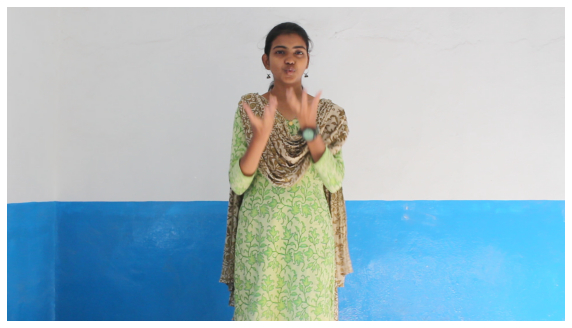

In [21]:
#test_vdo = '/kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5138.MOV' This is labelled in hot but it is cold.
test_image = vdos[0][27]
#Extract a frame
import matplotlib.pyplot as plt
# image = plt.imread(test_image) 
#imread will take filename as a string
plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.axis('off')
plt.show()

Detect Body

keypoints index : index = int(subset[n][i])

keypoints coord : x,y = candidate[index][0:2]
Candidates each element is a list of 4 elemnts. what are last 2?  first two are x,y co ordinates

In [22]:
oriImg = vdos[0][27]

candidate, subset = body_estimation(oriImg) #retval: 2 ndarrays
#canvas is ndarray
canvas = copy.deepcopy(oriImg) #recursively copies, so that nested objs are also copied truly and any chnage on copy doesn't affect the original
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

18
1


In [23]:
#https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/src/openpose/hand/handDetector.cpp

hands_list = util.handDetect(candidate, subset, oriImg)
''' handDetect:
    return value: [[x, y, w, True if left hand else False]].
    width=height since the network require squared input.
    x, y is the coordinate of top left 
'''
all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) #pretrained model, last layer: convolution_param-> num_output: 22, 21 Keypoints
    #peaks is coordinates wrt x,y top left.
    #adjust coordinates of keypoints
    print(peaks)
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    print(peaks)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y) 
    print(peaks)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

[[  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [213 164]
 [205 174]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]
 [  0   0]]
[[   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [1100  164]
 [1092  174]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]]
[[   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [1100  438]
 [1092  448]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]
 [   0    0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [

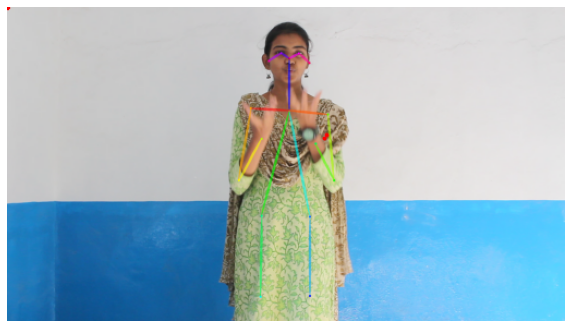

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(canvas) #canvas[:, :, [2, 1, 0]]
plt.axis('off')
plt.show()

16
1


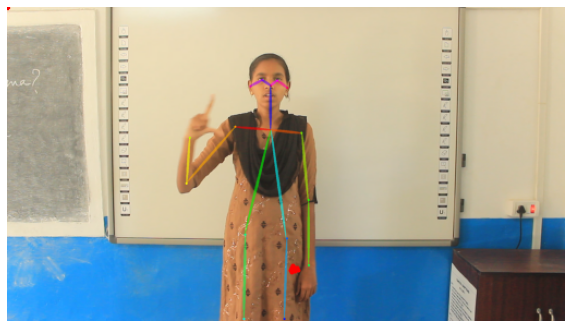

In [25]:
#https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/src/openpose/hand/handDetector.cpp
oriImg = vdos[4][23]

candidate, subset = body_estimation(oriImg) #retval: 2 ndarrays
#canvas is ndarray
canvas = copy.deepcopy(oriImg) #recursively copies, so that nested objs are also copied truly and any chnage on copy doesn't affect the original
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

hands_list = util.handDetect(candidate, subset, oriImg)
''' handDetect:
    return value: [[x, y, w, True if left hand else False]].
    width=height since the network require squared input.
    x, y is the coordinate of top left 
'''
all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) #pretrained model, last layer: convolution_param-> num_output: 22, 21 Keypoints
    #peaks is coordinates wrt x,y top left.
    #adjust coordinates of keypoints
    #print(peaks)
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    #print(peaks)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y) 
    #print(peaks)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)
plt.figure(figsize=(10,10))
plt.imshow(canvas) #canvas[:, :, [2, 1, 0]]
plt.axis('off')
plt.show()

In [26]:
hands_list

[[869, 793, 286, True], [459, 223, 347, False]]

In [27]:
all_hand_peaks

[array([[   0,    0],
        [   0,    0],
        [   0,    0],
        [   0,    0],
        [   0,    0],
        [   0,    0],
        [ 989,  908],
        [ 982,  908],
        [ 980,  910],
        [1000,  902],
        [ 987,  903],
        [ 980,  903],
        [ 976,  903],
        [ 998,  897],
        [ 988,  896],
        [ 981,  896],
        [ 977,  896],
        [   0,    0],
        [   0,    0],
        [ 982,  891],
        [ 983,  888]]),
 array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])]

In [28]:
print(len(vdos))
len(vdos[0]), vdos[0]

9


(71,
 /kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5136.MOV with 71 frames of size (1080, 1920, 3) at 25.00 fps)

In [29]:
#one vdo generate hand keypoints
i = 0
vdo_canvas = []
Num_of_frames = len(vdos[i])
for f in range(Num_of_frames):
    oriImg = vdos[0][f]

    candidate, subset = body_estimation(oriImg)
    canvas = copy.deepcopy(oriImg)
    hands_list = util.handDetect(candidate, subset, oriImg)
    all_hand_peaks = []
    for x, y, w, is_left in hands_list:
        peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) 
        peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
        peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y) 
        all_hand_peaks.append(peaks)

    canvas = util.draw_handpose(canvas, all_hand_peaks)
    vdo_canvas.append(canvas)

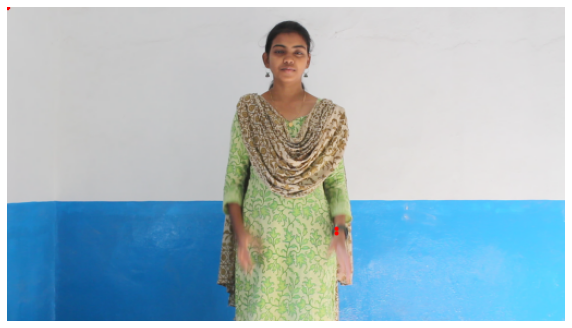

In [31]:
plt.figure(figsize=(10,20))
plt.imshow(vdo_canvas[14]) #canvas[:, :, [2, 1, 0]]
plt.axis('off')
plt.show()

In [32]:
type(vdos[0]),vdos[6]

(napari_video.napari_video.VideoReaderNP,
 /kaggle/input/include/Adjectives_6of8/Adjectives/87. hot/MVI_5295.MOV with 56 frames of size (1080, 1920, 3) at 25.00 fps)

In [37]:
#for all vdo generate hand keypoints
import random

num_of_vdos = len(vdos)
vdos_keypoints = []
vdos_canvas = []
for i in range(num_of_vdos):
    vdo_canvas = []
    vdo_keypoints = []
    Num_of_frames = len(vdos[i])
    print(i,Num_of_frames)
    frame_index_list =  random.sample([i for i in range(Num_of_frames)],49)
    for f in frame_index_list:
        print(f)
        try:
            oriImg = vdos[0][f]
        except:
            continue
        if(oriImg is None):
            continue
        candidate, subset = body_estimation(oriImg)
        canvas = copy.deepcopy(oriImg)
        hands_list = util.handDetect(candidate, subset, oriImg)
        all_hand_peaks = []
        for x, y, w, is_left in hands_list:
            peaks = hand_estimation(oriImg[y:y+w, x:x+w, :]) 
            peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
            peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y) 
            all_hand_peaks.append(peaks)
        vdo_keypoints.append(all_hand_peaks)
        canvas = util.draw_handpose(canvas, all_hand_peaks)
        vdo_canvas.append(canvas)
    vdos_canvas.append(vdo_canvas)
    vdos_keypoints.append(np.array(vdo_keypoints,dtype = 'float32'))

0 71
46
64
35
61
37
65
4
51
0
48
23
21
15
41
28
5
44
13
32
45
69
20
3
38
57
1
70
6
7
29
43
31
26
54
56
62
55
49
2
22
8
16
58
10
66
34
24
50
42
1 55
39
1
34
6
20
28
42
2
21
18
31
36
48
41
26
43
24
45
29
7
5
0
23
50
25
46
12
10
47
44
16
9
13
30
14
35
3
40
17
11
8
22
53
52
38
15
49
27
33
2 70
43
45
52
32
42
40
54
67
58
25
16
49
50
23
53
9
63
57
44
46
34
30
64
15
69
8
2
33
29
35
6
1
20
37
65
13
22
68
48
47
19
26
59
41
14
0
55
11
10
3 53
22
20
40
18
29
34
9
10
31
47
0
45
3
52
38
39
5
13
2
24
42
41
23
35
43
12
33
27
17
21
8
25
28
44
15
6
11
49
14
19
51
32
36
26
48
1
16
37
4
4 50
0
4
44
19
1
17
8
36
7
40
9
21
6
46
38
26
16
41
45
23
31
43
11
20
30
48
13
39
34
24
18
33
12
25
27
3
35
29
2
5
28
22
49
10
47
42
14
37
15
5 59
20
27
0
26
30
12
7
49
9
1
42
31
58
34
5
51
24
28
19
32
55
2
29
43
36
52
18
17
41
44
15
33
35
6
14
56
38
37
47
21
25
40
39
3
23
54
46
10
11
6 56
40
29
3
6
18
23
33
44
32
9
12
45
4
37
42
28
26
13
0
53
21
41
20
52
25
24
2
39
48
43
30
51
46
31
27
38
16
49
34
22
7
15
1
14
35
5
8
36


In [33]:
#Ignore this box, I was experimenting
#for one vdo, convert frames into np array
'''vdo_frames = vdos[0][0]
n = len(vdo_frames)
vdo_frames_np_arr = []
for i in range(n):
    vdo_frames_np_arr.append(np.array(vdo_frames[i],dtype = 'float32'))
'''

"vdo_frames = vdos[0][0]\nn = len(vdo_frames)\nvdo_frames_np_arr = []\nfor i in range(n):\n    vdo_frames_np_arr.append(np.array(vdo_frames[i],dtype = 'float32'))\n"

In [34]:
#useless ish, in our list of vdo each element is of type napari_video.napari_video.VideoReaderNP and the following code is converting it into np.ndarray
#Each vdo has frames, each frame is of type np.ndarray

#for all vdos
'''
vdo_np_arr = [] # list of np array of np array of frames
#np array of frames is a vdo.
for j in range(len(vdos)):
    vdo_frames = vdos[j]
    n = len(vdo_frames)
    vdo_frames_np_arr = []
    for i in range(n):
        vdo_frames_np_arr.append(np.array(vdo_frames[i],dtype = 'float32'))
    vdo_np_arr.append(np.array(vdo_frames_np_arr,dtype = 'float32'))
    '''

"\nvdo_np_arr = [] # list of np array of np array of frames\n#np array of frames is a vdo.\nfor j in range(len(vdos)):\n    vdo_frames = vdos[j]\n    n = len(vdo_frames)\n    vdo_frames_np_arr = []\n    for i in range(n):\n        vdo_frames_np_arr.append(np.array(vdo_frames[i],dtype = 'float32'))\n    vdo_np_arr.append(np.array(vdo_frames_np_arr,dtype = 'float32'))\n    "

In [ ]:
#Ignore this box as well nash, again was trying to understand the object type and dimensions
'''vr = vdos[0][0]
type(vdos[0][0]),type(vdos[0]), type(vdo_np_arr[0])'''

In [38]:
len(vdos_keypoints)

9

In [ ]:
#vdos_keypoints

In [ ]:
# f = open("VideoKeypoints.txt","w+")
# for i in range(11):
#     f.write(str(vdos_keypoints[i]))
# f.close()

In [39]:
#shape=(1, 49, 2, 21, 2), 1 vdo, 49 frames, 2 hands, 21 keypoints of 2 dimensions. 21*2 = 42 for a hand. 2 hands so, 42*2 = 84
X = pd.DataFrame(columns = [i for i in range(84*49)])
X #each row will be a video of 30 frames. 
#pick 49 frames of vdo
col = 0
for vdo in vdos_keypoints:
    for frame in vdo:
        for hands in frame:
            X[i],X[i+1] = map(list,zip(*hands))
            i = i+2
X

,0,1,2,3,4,5,6,7,8,9,...,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1109.0,548.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
obj_list = X.select_dtypes(include = 'object').columns.to_list()
for col in obj_list:
    X[col] = le_y.fit_transform(X[col])

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 4116 entries, 0 to 4115
dtypes: float32(1764), int64(2352)
memory usage: 530.7 KB


In [ ]:
#1 vdo, 3 frames, 2 hands, 5 keypoints of 2D
# temp = [[  [ [[0,0],[0,0],[1,1],[0,0],[2,2]] , [[0,0],[0,0],[1,1],[0,0],[2,2]] ]  ,  [ [[0,0],[0,0],[1,1],[0,0],[2,2]] , 
#     [[0,0],[0,0],[1,1],[0,0],[2,2]] ],  [ [[0,0],[0,0],[1,1],[0,0],[2,2]] , [[0,0],[0,0],[1,1],[0,0],[2,2]] ],   ]]

In [ ]:
# import pandas as pd
# X = pd.DataFrame(columns = [i for i in range(12)])
# X #each row will be a video of 30 frames. 
# #pick 49 frames of vdo
# i = 0
# for vdo in temp:
#     for frame in vdo:
#         for hand in frame:
#             X[i],X[i+1] = map(list,zip(*hand))
#             i = i+2
# X

In [50]:
X_test = X.tail(3)
X_train = X.head(6)

In [51]:
X_train.shape

(6, 4116)

In [52]:
#Caution runnning this takes alot of time, use X_test.shape instead
X_test.shape

(3, 4116)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 4116 entries, 0 to 4115
dtypes: float32(1764), int64(2352)
memory usage: 151.7 KB


In [54]:
Y_train

array([1, 1, 2, 2, 0, 0])

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [57]:
model.fit(X_train,Y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [58]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 1])

In [59]:
Y_pred_cat = le_y.inverse_transform(Y_pred)
Y_pred_cat

ValueError: y contains previously unseen labels: [1]

Use images along with the keypoints vectors to classify